In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 4 (Bonus Question): Removing Motion Blur

In this task, you guys have to help me restore a blurred image of a Diya scene, which I captured while traveling via my car. See the image below:

![](https://github.com/ee604/ee604_assignments/raw/master/assignment_3/imgs/diya_mb.png)

<br>
Since I only came to know about the image's low-quality next day and it's not possible to go back in time to capture that image again, the only possible option is to restore that blurred image. I know that my mobile phone has an excellent camera sensor and the only possible reason for the blurred image is due to my car's motion. I tried to simulate a similar situation and captured a photo of a templated image to help you.

![](https://github.com/ee604/ee604_assignments/raw/master/assignment_3/imgs/template_img.png)

### Your Task
Use the template image to restore the image of Diya scene. Your not allowed to use any external library specifically meant for restoration purpose. Follow along the following hints to achieve your target:
* Follow the following restoration equation: $G(x, y) = F(x, y)H(x, y) + N(x, y)$; where G represents the blurred image and F original image.
* Consider there is negligible noise while capturing the template image
* Refer to numpy.fft module for most of the fourier analysis
* Refer to lecture slides on Weiner Filtering. For additional reference, you can refer to [this](https://www.ee.columbia.edu/~xlx/ee4830/notes/lec7.pdf)

There are two images on which your algorithm will be tested. Try to achieve as clear images as possible for both of the cases. Note that both of the images may need different values for the parameter. For example, if you use Weiner Filter for restoration, the value of parameter $K = \frac{S_\eta}{S_f}$ can be different for both images. You are supposed to tune that manually. In your observations, explain why you needed/ not needed different parameter values for the two images.

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-xf88znss
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=60d885d007c528b59766e091049166be660683fe5f82569e8b36faead6580636
  Stored in directory: /tmp/pip-ephem-wheel-cache-iw4qi2os/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-xf88znss


In [3]:
# Importing required libraries

import cv2
import numpy as np
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset

download_dataset(assignment_no=3, task_no=4)

Download Complete!


In [4]:
template_input = np.load("data/template_input.npy")
template_output = np.load("data/template_output.npy")

diya_motion_blur = np.load("data/diya_motion_blur.npy")
diya_motion_blur_nd_noise = np.load("data/diya_motion_blur_nd_noise.npy")

In [5]:
def restoreImage(img, template_input_img, template_output_img, param=None):
    '''    
    Inputs:                      
    + img - image which need to be restored
    + template_input_img - original image of the template
    + template_output_img - captured image of the template
    + param - a python dictionary of different parameter value that you will use.
            - https://www.tutorialspoint.com/python/python_dictionary.htm
    
    Ouputs:
    + out_img - restored image
    
    Allowed external package:
    + You are free to use any OpenCV/numpy module except any direct implementation meant for this task.
    
    '''
    out_img = np.copy(img)
    
    #############################
    # Start your code from here #
    #############################
    K = param["K"]
    
    f = np.fft.fftshift(np.fft.fft2(template_output_img))

    g = np.fft.fftshift(np.fft.fft2(template_input_img))
  
    img = np.fft.fftshift(np.fft.fft2(img))

    h = f/(g + 0.00001)

    w = np.conj(h)/(np.abs(h)**2 + K)
    
    dft_out = w * img
    out_img = np.real(np.fft.ifft2(np.fft.ifftshift(dft_out)))
    
    #############################
    # End your code here ########
    #############################
    
    return out_img

In [6]:
def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, int(subplot_id))
    plt.imshow(img)
    plt.axis("off")
    plt.title(name)

In [7]:
# Define your parameters for different images in this cell
# Use the empty dictionary declared below inside your code to store the param values the two images

param_diya_motion_blur = {}
param_diya_motion_blur_nd_noise = {}

#############################
# Start your code from here #
#############################

param_diya_motion_blur['K'] = 0.001
param_diya_motion_blur_nd_noise['K'] = 0.009

#############################
# End your code here ########
#############################

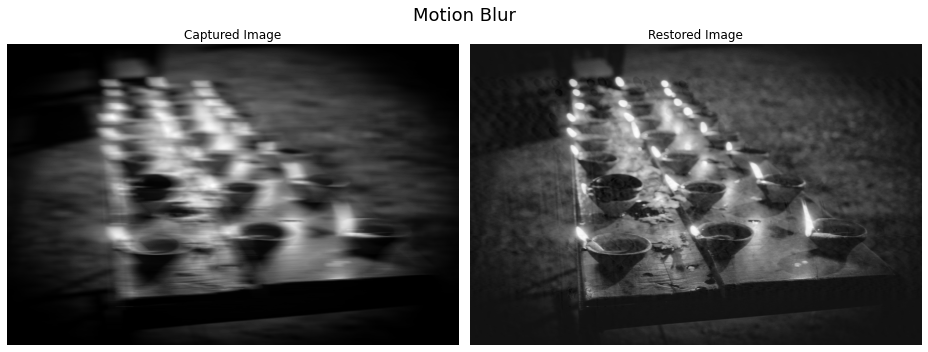

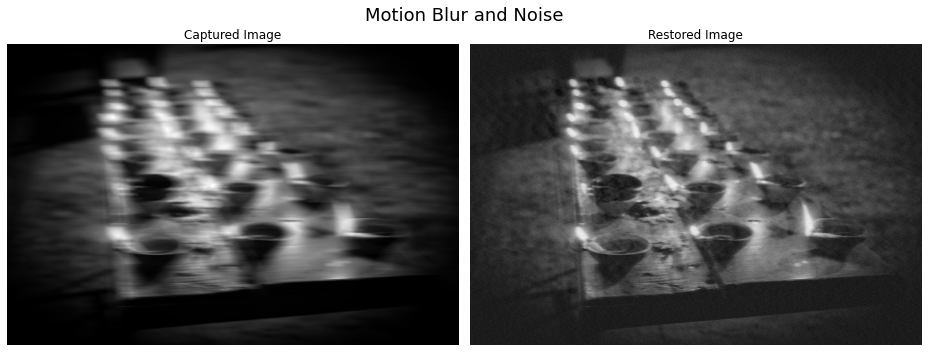

In [8]:
restored = restoreImage(diya_motion_blur, template_input, template_output, param=param_diya_motion_blur)
fig = plt.figure(figsize=(13, 9))
plt.gray()
plot_frame(1, 2, 1, diya_motion_blur, "Captured Image")
plot_frame(1, 2, 2, restored, "Restored Image")
fig.suptitle('Motion Blur', fontsize=18, y=0.79)
plt.tight_layout()
plt.show()

print("\n\n")

restored = restoreImage(diya_motion_blur_nd_noise, template_input, template_output, param=param_diya_motion_blur_nd_noise)
fig = plt.figure(figsize=(13, 9))
plt.gray()
plot_frame(1, 2, 1, diya_motion_blur, "Captured Image")
plot_frame(1, 2, 2, restored, "Restored Image")
fig.suptitle('Motion Blur and Noise', fontsize=18, y=0.79)
plt.tight_layout()
plt.show()